# Dimension Reduction for MNIST Dataset

In [1]:
import pandas as pd
import numpy as np

## Used functions

In [2]:
def get_intensity(row):
    """
    Compute the intensity of a given row of pixels.
    """
    return row.sum()/255

def vert_symmetry(row):
    """
    Compute the vertical symmetry of a given row of pixels.
    """
    res = 0
    for i in range(28):
        for j in range(14):
            res += abs(row[i*28 + j] - row[i*28 + 27 - j])
            
    return res/255


def hor_symmetry(row):
    """
    Compute the horizontal symmetry of a given row of pixels.
    """
    res = 0
    for i in range(14):
        for j in range(28):
            res += abs(row[i*28 + j] - row[(27 - i)*28 + j])
            
    return res/255

The symmetry metric will be the sum of vertical and horizontal symmetry.

## Test Treatment

In [3]:
test = pd.read_csv('dataset_digits/test.csv', delimiter=';')

In [4]:
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1111,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1112,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_redu = pd.DataFrame(test['label'].copy())
test.drop('label', axis=1, inplace=True)

In [6]:
test_redu['intensity'] = test.apply(get_intensity, axis=1)
test_redu['vert_sym'] = test.apply(vert_symmetry, axis=1)
test_redu['hor_sym'] = test.apply(hor_symmetry, axis=1)
test_redu['symmetry'] = (test_redu['vert_sym'] + test_redu['hor_sym'])

In [7]:
test_redu

,label,intensity,vert_sym,hor_sym,symmetry
0,0,147.933333,64.811765,65.658824,130.470588
1,0,131.054902,56.325490,66.396078,122.721569
2,0,134.890196,69.917647,81.807843,151.725490
3,0,139.976471,71.858824,62.062745,133.921569
4,0,129.580392,69.862745,60.411765,130.274510
...,...,...,...,...,...
1110,5,96.121569,66.552941,72.968627,139.521569
1111,5,98.439216,59.490196,71.239216,130.729412
1112,5,95.141176,59.156863,63.070588,122.227451
1113,5,106.882353,58.168627,69.839216,128.007843


In [8]:
test_redu['label'].value_counts()

4    314
1    292
5    291
0    218
Name: label, dtype: int64

In [9]:
print(f"Average intensity of number 0: {test_redu[test_redu['label'] == 0]['intensity'].mean()}")
print(f"Average intensity of number 1: {test_redu[test_redu['label'] == 1]['intensity'].mean()}")
print(f"Average intensity of number 4: {test_redu[test_redu['label'] == 4]['intensity'].mean()}")
print(f"Average intensity of number 5: {test_redu[test_redu['label'] == 5]['intensity'].mean()}")

Average intensity of number 0: 135.58751574024106
Average intensity of number 1: 55.736153639538
Average intensity of number 4: 93.71358811040339
Average intensity of number 5: 98.6789838959639


In [10]:
print(f"Average symmetry of number 0: {test_redu[test_redu['label'] == 0]['symmetry'].mean()}")
print(f"Average symmetry of number 1: {test_redu[test_redu['label'] == 1]['symmetry'].mean()}")
print(f"Average symmetry of number 4: {test_redu[test_redu['label'] == 4]['symmetry'].mean()}")
print(f"Average symmetry of number 5: {test_redu[test_redu['label'] == 5]['symmetry'].mean()}")

Average symmetry of number 0: 139.90275229357798
Average symmetry of number 1: 75.05739994627987
Average symmetry of number 4: 104.8741351317597
Average symmetry of number 5: 126.71620510747256


In [11]:
# Creating the csv
test_redu[['label', 'intensity', 'symmetry']].to_csv('dataset_digits/test_redu.csv', index=False)

## Train Treatment

In [12]:
train = pd.read_csv('dataset_digits/train.csv', delimiter=';')

In [13]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2182,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2183,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2184,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_redu = pd.DataFrame(train['label'].copy())
train.drop('label', axis=1, inplace=True)

In [15]:
train_redu['intensity'] = train.apply(get_intensity, axis=1)
train_redu['vert_sym'] = train.apply(vert_symmetry, axis=1)
train_redu['hor_sym'] = train.apply(hor_symmetry, axis=1)
train_redu['symmetry'] = (train_redu['vert_sym'] + train_redu['hor_sym'])

In [16]:
train_redu

,label,intensity,vert_sym,hor_sym,symmetry
0,0,145.435294,78.321569,70.250980,148.572549
1,0,118.576471,71.007843,66.105882,137.113725
2,0,127.600000,56.619608,77.427451,134.047059
3,0,138.047059,74.501961,76.501961,151.003922
4,0,146.215686,57.596078,64.905882,122.501961
...,...,...,...,...,...
2181,5,105.686275,67.898039,65.992157,133.890196
2182,5,113.050980,45.113725,71.584314,116.698039
2183,5,110.725490,65.031373,67.988235,133.019608
2184,5,99.305882,70.270588,61.862745,132.133333


In [17]:
train_redu['label'].value_counts()

1    608
4    577
5    576
0    425
Name: label, dtype: int64

In [18]:
print(f"Average intensity of number 0: {train_redu[train_redu['label'] == 0]['intensity'].mean()}")
print(f"Average intensity of number 1: {train_redu[train_redu['label'] == 1]['intensity'].mean()}")
print(f"Average intensity of number 4: {train_redu[train_redu['label'] == 4]['intensity'].mean()}")
print(f"Average intensity of number 5: {train_redu[train_redu['label'] == 5]['intensity'].mean()}")

Average intensity of number 0: 134.6218131487889
Average intensity of number 1: 55.714344685242516
Average intensity of number 4: 94.27153294593401
Average intensity of number 5: 98.96429738562091


In [19]:
print(f"Average symmetry of number 0: {train_redu[train_redu['label'] == 0]['symmetry'].mean()}")
print(f"Average symmetry of number 1: {train_redu[train_redu['label'] == 1]['symmetry'].mean()}")
print(f"Average symmetry of number 4: {train_redu[train_redu['label'] == 4]['symmetry'].mean()}")
print(f"Average symmetry of number 5: {train_redu[train_redu['label'] == 5]['symmetry'].mean()}")

Average symmetry of number 0: 138.3588465974625
Average symmetry of number 1: 75.49518833849329
Average symmetry of number 4: 105.42209535460631
Average symmetry of number 5: 126.77283496732025


In [20]:
# Creating the csv
train_redu[['label', 'intensity', 'symmetry']].to_csv('dataset_digits/train_redu.csv', index=False)

In [21]:
import matplotlib.pyplot as plt

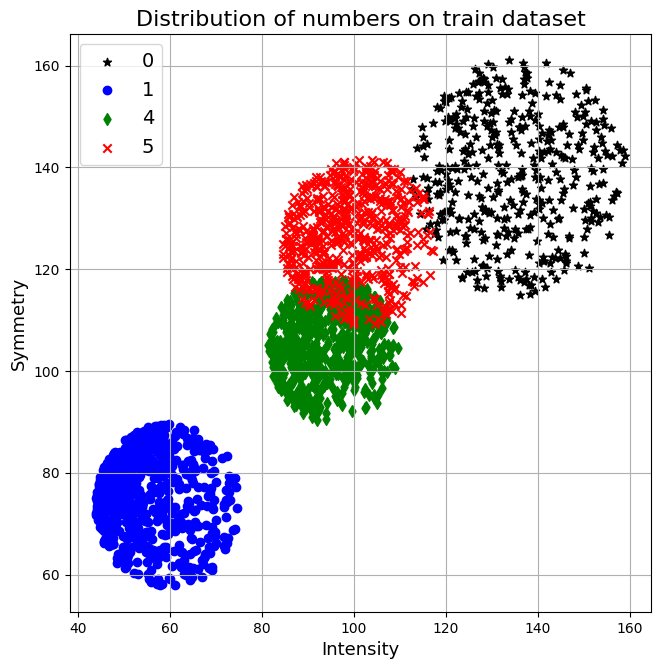

In [22]:
plt.figure(figsize=(7.5, 7.5))
plt.grid()

plt.scatter(train_redu[train_redu['label'] == 0]['intensity'],
            train_redu[train_redu['label'] == 0]['symmetry'],
            color='black',
            label='0',
            marker='*')

plt.scatter(train_redu[train_redu['label'] == 1]['intensity'], 
            train_redu[train_redu['label'] == 1]['symmetry'], 
            color='blue',
            label='1',
            marker='o')

plt.scatter(train_redu[train_redu['label'] == 4]['intensity'],
            train_redu[train_redu['label'] == 4]['symmetry'],
            color='green',
            label='4',
            marker='d')

plt.scatter(train_redu[train_redu['label'] == 5]['intensity'],
            train_redu[train_redu['label'] == 5]['symmetry'],
            color='red',
            label='5',
            marker='x')

plt.xlabel('Intensity', fontsize=13)
plt.ylabel('Symmetry', fontsize=13)
plt.title("Distribution of numbers on train dataset", fontsize = 16)

plt.legend(loc='upper left', prop={'size': 14})